In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('Computer_Data.csv')

In [3]:
data.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [4]:
data.drop('Unnamed: 0',1,inplace=True)

In [5]:
data.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [15]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [16]:
data['cd'] = LabelEncoder().fit_transform(data['cd'])

In [18]:
data['multi'] = LabelEncoder().fit_transform(data['multi'])

In [19]:
data['premium'] = LabelEncoder().fit_transform(data['premium'])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   price    6259 non-null   int64
 1   speed    6259 non-null   int64
 2   hd       6259 non-null   int64
 3   ram      6259 non-null   int64
 4   screen   6259 non-null   int64
 5   cd       6259 non-null   int64
 6   multi    6259 non-null   int64
 7   premium  6259 non-null   int64
 8   ads      6259 non-null   int64
 9   trend    6259 non-null   int64
dtypes: int64(10)
memory usage: 489.1 KB


In [21]:
temp = StandardScaler().fit_transform(data.drop('price',1))
computer = pd.DataFrame(temp, columns = data.columns[1:])

In [24]:
computer['price'] = data.price

In [25]:
computer.head()

,speed,hd,ram,screen,cd,multi,premium,ads,trend,price
0,-1.276752,-1.301994,-0.761359,-0.672591,-0.931558,-0.4026,0.329205,-1.701219,-1.895886,1499
1,-0.898610,-1.282654,-1.116558,-0.672591,-0.931558,-0.4026,0.329205,-1.701219,-1.895886,1795
2,-1.276752,-0.953869,-0.761359,0.432329,-0.931558,-0.4026,0.329205,-1.701219,-1.895886,1595
3,-1.276752,-0.953869,-0.050962,-0.672591,-0.931558,-0.4026,-3.037618,-1.701219,-1.895886,1849
4,-0.898610,-0.296300,1.369834,-0.672591,-0.931558,-0.4026,0.329205,-1.701219,-1.895886,3295


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
xTrain,xTest, yTrain,yTest = train_test_split(computer.drop('price',1),computer.price,test_size=0.2)

In [29]:
xTrain.shape

(5007, 9)

In [220]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

In [231]:
model = Sequential()

In [232]:
model.add(Dense(20,activation='relu',input_shape=(9,)))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [233]:
model.fit(xTrain,yTrain,epochs=50,verbose=0)

In [234]:
model.evaluate(xTrain,yTrain)

5007/5007 [==============================] - 0s 25us/step


52475.49703735083

In [235]:
model.evaluate(xTest,yTest)

1252/1252 [==============================] - 0s 32us/step


58083.65322983227

In [236]:
temp = model.history.history

In [237]:
temp

{'loss': [5243318.528659876,
  3728970.674605552,
  771530.5041816457,
  345476.11151263234,
  218926.0726794987,
  159124.7912984322,
  127961.89156274965,
  110489.60884137209,
  99142.3669877796,
  91215.02077716198,
  85333.97226929174,
  80537.33219040219,
  76337.70853617435,
  73220.6144842533,
  70494.84540549481,
  68224.12567483648,
  66370.91411945153,
  64809.042617679,
  63287.287606725586,
  62137.9381522119,
  61217.06829501198,
  60492.989999937585,
  59707.62964974036,
  58977.2217637495,
  58323.09046007464,
  57910.61325394448,
  57547.851303487616,
  57038.50865741087,
  56771.87109296984,
  56413.91856479054,
  56003.85504980527,
  55609.06263418714,
  55374.0696657492,
  55046.98519104504,
  55065.53221349486,
  54733.950239196376,
  54685.25901628345,
  54405.14104706536,
  54239.69122135261,
  54115.998697916664,
  53902.571382096314,
  53661.68637579264,
  53618.26159470491,
  53435.38745677926,
  53457.44813979179,
  53033.99462159227,
  53097.52117348213,
  5

In [238]:
history = pd.DataFrame(temp)

In [239]:
history.head()

,loss
0,5.243319e+06
1,3.728971e+06
2,7.715305e+05
3,3.454761e+05
4,2.189261e+05


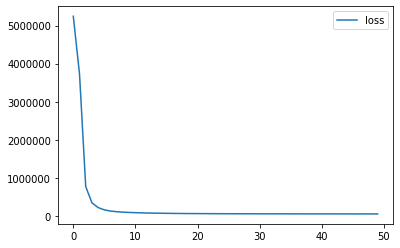

In [240]:
history.plot()

In [245]:
pred = model.predict(xTest)

In [254]:
Prediction = pd.DataFrame({'Actual':yTest,'Predicted':pred.flatten()})

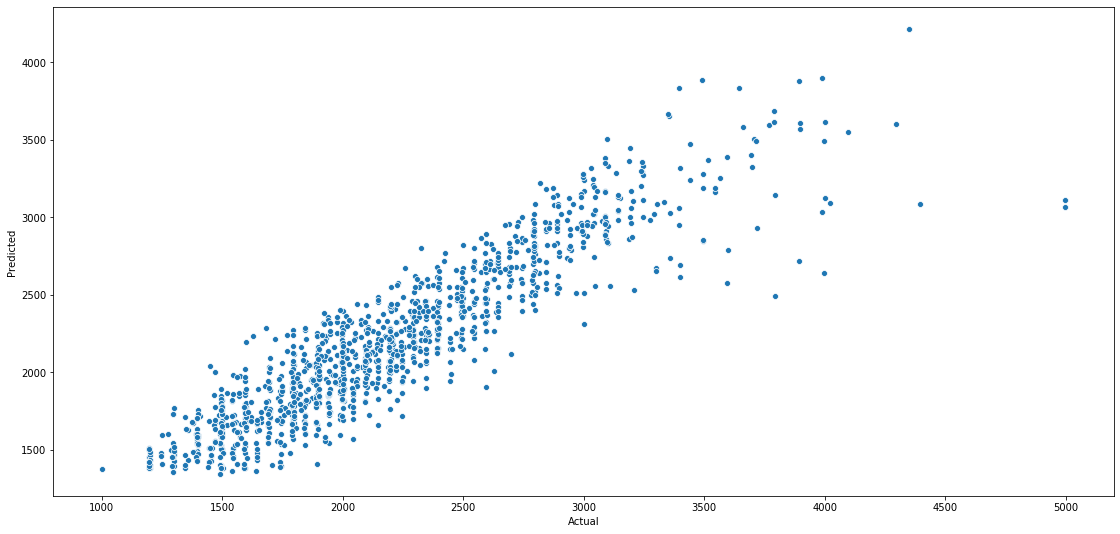

In [255]:
plt.figure(figsize=(19,9))

sns.scatterplot(x='Actual',y='Predicted',data=Prediction)

In [256]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [257]:
mean_absolute_error(yTest,pred)

175.2211569886619

In [258]:
mean_squared_error(yTest,pred)

58083.65266805827

In [259]:
r2_score(yTest,pred)

0.8339226454514819

<Figure size 1368x648 with 0 Axes>

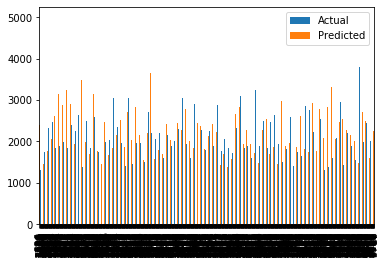

In [265]:
plt.figure(figsize=(19,9))
Prediction.plot(kind='bar')

In [266]:
from keras.models import load_model

In [267]:
model.save('ComputerData.h5')

In [268]:
myModel = load_model('ComputerData.h5')

In [269]:
myModel.predict(yTest[0])

KeyError: 0